# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date:
* Student Name: Royal Wang
* Student Net ID: rjw8ng
* This URL: https://rivanna-portal.hpc.virginia.edu/node/udc-aw34-10c1/31030/lab?
* GitHub Repo URL: https://github.com/rjw8ng/DS-5100-Final-Project

# The Monte Carlo Module

In [18]:
import pandas as pd
import numpy as np
import random

class Die:
    '''
    A die has N sides, or “faces”, and W weights, and can be rolled to select a face. 

    W defaults to 1.0 for each face but can be changed after the object is created.
    Note that the weights are just numbers, not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    '''
    def __init__(self, face):
        
        '''
        Takes an array of faces as an argument. The array's data type (dtype) may be strings or numbers.
        Internally iInitializes the weights to 1.0 for each face.
        '''
        
        self.face = face
        self.weight = [1.0 for i in face]
        self.df = pd.DataFrame({"face": self.face, "weight": self.weight})
    
    def change_weight(self, face_value, new_weight):
        
        '''
        Input: 
        Takes two arguments: the face value to be changed and the new weight.
        
        Output:
        Changes the weights value of the face inputted.
        '''
        
        if face_value not in self.df["face"].values:
            print("Face not in DataFrame!")
        else:
            try: 
                self.df.loc[(self.df["face"]==face_value)] = [face_value, float(new_weight)]
                
            except:
                print("Weight value cannot be converted to float!")
                
    def roll(self, amount = 1):
        
        '''
        Input:
        Takes a parameter of how many times the die is to be rolled.
        
        Output:
        Returns a list of outcomes.
        '''
        
        lst = [i for i in self.df["weight"]]
        sm = sum(lst)
        p = [x / sm for x in lst]
        
        result = np.random.choice([i for i in self.df["face"]], amount, p = p)
        
        return result
    
    def show(self):
        
        '''
        Output:
        Returns the dataframe created in the initializer.
        '''
        
        return self.df
    
class Game:
    '''
    A game consists of rolling of one or more dice of the same kind one or more times. 

    Each game is initialized with one or more of similarly defined dice (Die objects).
    By “same kind” and “similarly defined” we mean that each die in a given game has the same number of sides and associated faces, but each die object may have its own weights.
    The class has a behavior to play a game, i.e. to rolls all of the dice a given number of times.
    The class keeps the results of its most recent play
    '''
    
    def __init__(self, die_object):
        
        '''
        Takes a single parameter, a list of already instantiated similar Die objects.
        '''
        
        self.die_object = die_object
    
    def play(self, turns):
        
        '''
        Input:
        Takes a parameter to specify how many times the dice should be rolled.
        
        Output:
        Dataframe containing the play output (Roll Number, Die Number, Roll Value)
        '''
        
        new_df = pd.DataFrame(columns = ["Roll_Number", "Die", "Roll"])
        
        counter = 0
        for i in self.die_object:
            
            temp_df = pd.DataFrame()
            
            output_list = i.roll(turns)
            length = len(output_list)
            
            
            temp_df["Roll_Number"] = [int(j) for j in range(1, length+1)]
            temp_df["Die"] = [counter for k in range(1, length+1)]
            temp_df["Roll"] = output_list
            
            new_df = pd.concat([new_df, temp_df], ignore_index=True)
            counter += 1
        
        new_df["Roll Number"] = new_df['Roll_Number']
        new_df = new_df[["Roll_Number", "Roll Number", "Die", "Roll"]]
        
        return new_df.set_index('Roll_Number')
        
    def show_game(self, dataframe, form = 'wide'):
        
        '''
        A method to show the user the results of the most recent play.
        
        Input:
        Takes a parameter to return the dataframe in narrow or wide form.
        This parameter defaults to wide form.
        This parameter should raise an exception of the user passes an invalid option.
        
        Output:
        The narrow form of the dataframe will have a two-column index with the roll number and the die number, and a column for the face rolled.
        The wide form of the dataframe will a single column index with the roll number, and each die number as a column.
        '''
        
        if form != 'wide' and form != 'narrow':
            print("Set second arguement to either 'wide' or 'narrow'!")
            
        elif form == 'wide':
            return dataframe.pivot(index = "Roll Number", columns = "Die", values = "Roll")
        else:
            return dataframe.set_index(["Die", "Roll Number"]) 
        
class Analyzer:
    '''
    An analyzer takes the results of a single game and computes various descriptive statistical properties about it. These properties results are available as attributes of an Analyzer object.
    '''
    def __init__(self, result):
        
        '''
        Takes a game object as its input parameter. 
        At initialization time, it also infers the data type of the die faces used.
        '''
        
        self.result = result
        self.jackpot_result = pd.DataFrame({"Roll Number": [],"Value": []})
        
    def jackpot(self):
        
        '''
        A jackpot method to compute how many times the game resulted in all faces being identical.
        
        Output:
        Returns an integer for the number times to the user.
        Stores the results as a dataframe of jackpot results in a public attribute.
        '''
        
        self.jackpot_df = pd.DataFrame({"Roll Number": [],"Value": []})
        
        jackpot_count = 0
        
        turns = max(self.result["Roll Number"])
        
        for i in range(1, turns + 1):
            lst = [j for j in self.result[self.result["Roll Number"]==i]["Roll"]]
            
            counts = lst.count(lst[0])
            list_length = len(lst)
            
            if counts == list_length:
                self.jackpot_df.loc[len(self.jackpot_df)] = [i, lst[0]]
                jackpot_count += 1
            else:
                pass
            
        self.jackpot_result = self.jackpot_df
        
        return jackpot_count
                   
    def combo(self):
        
        '''
        A combo method to compute the distinct combinations of faces rolled, along with their counts
        
        Output:
        Stores the results as a dataframe in a public attribute.
        '''
        self.combo_df = pd.DataFrame()
        
        temp_lst = [i for i in self.result["Roll"]]
        temp_lst = sorted(list(set(temp_lst)))
        
        columns = []
        for i in range(1, len(set(self.result["Die"]))+1):
            columns.append(i) 
            self.combo_df[i] = ""
        self.combo_df["count"] = ""
        
        temp_dict = {}
        
        turns = max(self.result["Roll Number"])
        
        for i in range(1, turns + 1):
            lst = [str(j) for j in self.result[self.result["Roll Number"] == i]["Roll"]]
            
            lst = sorted(lst)
            lst_string = " ".join(lst)
            
            if lst_string in temp_dict:
                temp_dict[lst_string] += 1
            else:
                temp_dict[lst_string] = 1 
        
        for key, value in temp_dict.items():
            lst_values = key.split(" ")
            df_lst = [i for i in lst_values]
            df_lst.append(value)
            self.combo_df.loc[len(self.combo_df)] = df_lst
        
        self.combo_df = self.combo_df.sort_values(by = columns)
        
        return self.combo_df.set_index(columns) 
        
            
    def face_counts_per_roll(self):
        
        '''
        A face counts per roll method to compute how many times a given face is rolled in each event.
        
        Output:
        Stores the results as a dataframe in a public attribute.
        '''
        
        turns = max(self.result["Roll Number"])
        distinct_outcomes = set(self.result["Roll"])
        distinct_outcomes = sorted([i for i in distinct_outcomes])
        
        df = pd.DataFrame()
        
        for i in distinct_outcomes:
            df[i] = ""
        
        for i in range(1, turns + 1):
            lst = [j for j in self.result[self.result["Roll Number"] == i]["Roll"]]
            
            temp_list = []
            for j in distinct_outcomes:
                temp_list.append(lst.count(j))
            
            df.loc[len(df)] = temp_list
        
        return df

# Test Module

In [ ]:
import unittest
from montecarlo import Die, Game, Analyzer
import pandas.testing as pd_testing
import pandas as pd
import random


class EnrollInTestCase(unittest.TestCase): 
    
    '''
    Create 2 Die objects and change the weight of the first Die object to float.
    Check if the change_weight function changes the weight of face.
    '''
    def test_1_change_weight_tofloat__test(self):
        Die_Object1 = Die([1,2,3,4,5,6])
        Die_Object2 = pd.DataFrame({"face": [1,2,3,4,5,6], "weight": [1.0,1.0,1.0,1.0,1.0,5.0]})
        Die_Object1.change_weight(6, 5)
        
        self.assertEqual(int(Die_Object1.df["weight"][Die_Object1.df["face"]==6]), int(Die_Object2["weight"][Die_Object2["face"]==6]))
    
    '''
    Create 2 Die objects and change the weight of the first Die object to nonfloat.
    Check if the change_weight function changes the weight of face.
    '''
    def test_2_change_weight_nonfloat_test(self):
        Die_Object1 = Die([1,2,3,4,5,6])
        Die_Object2 = Die([1,2,3,4,5,6])
        Die_Object1.change_weight(6, "yes")
        
        self.assertEqual(int(Die_Object1.df["weight"][Die_Object1.df["face"]==6]), int(Die_Object2.df["weight"][Die_Object2.df["face"]==6]))
    
    '''
    Create 2 Die objects and change the weight of non-existant face of the first Die object.
    Check if the change_weight function changes the weight of face.
    '''
    def test_3_change_weight_not_face_test(self):
        Die_Object1 = Die([1,2,3,4,5,6])
        Die_Object2 = Die([1,2,3,4,5,6])
        Die_Object1.change_weight(7, 5.0)
        
        self.assertEqual(int(Die_Object1.df["weight"][Die_Object1.df["face"]==6]), int(Die_Object2.df["weight"][Die_Object2.df["face"]==6]))
    
    '''
    Create Die object and check if roll function generates the correct amount of rolls.
    '''
    def test_4_roll_test(self):
        Die_Object = Die([1,2,3,4,5,6])
        result = Die_Object.roll(6)
        
        self.assertEqual(len(result), 6)
        
    '''
    Create Die object and check output equals dataframe.
    '''
    def test_5_show_test(self):
        Die_Object = Die([1,2,3,4,5,6])
        
        pd_testing.assert_frame_equal(Die_Object.df, Die_Object.show())

    '''
    Create 3 Die objects and change the weight of the second Die object.
    Run play function to see if the correct number of rolls per die are rolled.
    '''
    def test_6_play(self):
        D1 = Die([1,2,3,4,5,6])
        D2 = Die([1,2,3,4,5,6])
        D3 = Die([1,2,3,4,5,6])
        D2.change_weight(6,5.0)
        lst = [D1, D2, D3]
        gm = Game(lst)
        
        df = gm.play(3)
        
        Roll_number = [i for i in gm.play(3)["Roll Number"]]
        Dies = [i for i in gm.play(3)["Die"]]
        
        self.assertTrue([[1,2,3,1,2,3,1,2,3], [0,0,0,1,1,1,2,2,2]], [Roll_number, Dies])
        
    '''
    Create 3 Die objects and change the weight of the second Die object.
    Check if the index and column names are correct after using the 'wide' arguement with the show function. 
    '''
    def test_7_show_wide(self):
        D1 = Die([1,2,3,4,5,6])
        D2 = Die([1,2,3,4,5,6])
        D3 = Die([1,2,3,4,5,6])
        D2.change_weight(6,5.0)
        lst = [D1, D2, D3]
        gm = Game(lst)
        
        col = [i for i in gm.show_game(gm.play(4), "wide").columns]
        index = list(gm.show_game(gm.play(4), "wide").index.values)
        
        self.assertEqual([col, index], [[0,1,2], [1,2,3,4]])
        
    '''
    Create 3 Die objects and change the weight of the second Die object.
    Check if the length of the columns match the 'narrow' arguement output with the show function. 
    '''
    def test_8_show_narrow(self):
        D1 = Die([1,2,3,4,5,6])
        D2 = Die([1,2,3,4,5,6])
        D3 = Die([1,2,3,4,5,6])
        D2.change_weight(6,5.0)
        lst = [D1, D2, D3]
        gm = Game(lst)
        
        col = [i for i in gm.show_game(gm.play(4), "narrow")["Roll"]]
        
        self.assertEqual(len(col), 12)
        
    '''
    Create 2 Die objects and compare the length of the jackpot dataframe output with the jackpot function count.
    ''' 
    def test_9_jackpot(self):
        D1 = Die([1,2])
        D2 = Die([1,2])
        lst = [D1, D2]
        gm = Game(lst)
        test = gm.play(10)
        
        analyze = Analyzer(test)
        count = analyze.jackpot()
        
        self.assertEqual(count, len(analyze.jackpot_result.index))
        
    '''
    Create 2 Die objects and compare if the max roll numnber matches the total combo count.
    '''
    def test_10_combo(self):
        D1 = Die([1,2])
        D2 = Die([1,2])
        lst = [D1, D2]
        
        gm = Game(lst)
        test = gm.play(10)
        
        analyze = Analyzer(test)
        
        self.assertEqual(max(analyze.result["Roll Number"]), sum(analyze.combo()["count"]))
    
    '''
    Create 2 Die objects and compares if the total rolls per face matches the rolls generated with the Game function.
    '''
    def test_11_face_counts_per_roll(self):
        D1 = Die([1,2])
        D2 = Die([1,2])
        lst = [D1, D2]
        
        gm = Game(lst)
        test = gm.play(10)
        
        analyze = Analyzer(test)
        colname = analyze.face_counts_per_roll().columns
        
        switch = True
        for i in colname:
            result_count = len(analyze.result[analyze.result["Roll"] == i].index)
            method_count = sum(analyze.face_counts_per_roll()[i])
            if result_count == method_count:
                pass
            else:
                swtich = False
                break
                
        self.assertTrue(switch)
        
if __name__ == '__main__':

    unittest.main(verbosity=2)

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

<AxesSubplot:xlabel='Games'>

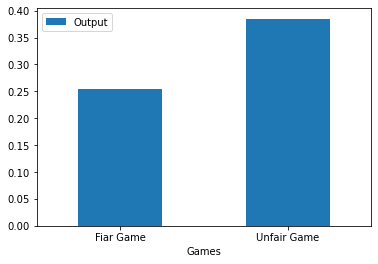

In [19]:
coin1 = Die(["H", "T"])
coin2 = Die(["H", "T"])
coin2.change_weight("T",5.0)

fair_coins = [coin1, coin1, coin1]
unfair_coins = [coin1, coin2, coin2]
        
gm_fair = Game(fair_coins)
gm_unfair = Game(unfair_coins)

game1 = gm_fair.play(1000)
game2 = gm_unfair.play(1000)

analyze1 = Analyzer(game1)
analyze2 = Analyzer(game2)

jackpot1 = analyze1.jackpot()
jackpot2 = analyze2.jackpot()

jackpot_frequecy1 = jackpot1/1000
jackpot_frequecy2 = jackpot2/1000

df = pd.DataFrame({"Games": ["Fiar Game", "Unfair Game"], "Output": [jackpot_frequecy1, jackpot_frequecy2]})

df.plot.bar(x = "Games", y = "Output", rot = 0)

## Scenario 2

<AxesSubplot:xlabel='Games'>

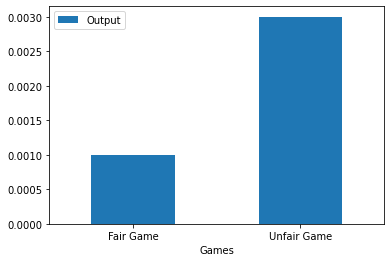

In [25]:
D1 = Die([1,2,3,4,5,6])
D2 = Die([1,2,3,4,5,6])
D3 = Die([1,2,3,4,5,6])

D2.change_weight(6,5.0)
D3.change_weight(1,5.0)

fair_die = [D1, D1, D1, D1, D1]
unfair_die = [D2, D2, D3, D1, D1]

gm_fair = Game(fair_die)
gm_unfair = Game(unfair_die)

game1 = gm_fair.play(1000)
game2 = gm_unfair.play(1000)

analyze1 = Analyzer(game1)
analyze2 = Analyzer(game2)

jackpot1 = analyze1.jackpot()
jackpot2 = analyze2.jackpot()

jackpot_frequecy1 = jackpot1/1000
jackpot_frequecy2 = jackpot2/1000


df = pd.DataFrame({"Games": ["Fair Game", "Unfair Game"], "Output": [jackpot_frequecy1, jackpot_frequecy2]})

df.plot.bar(x = "Games", y = "Output", rot = 0)

<AxesSubplot:title={'center':'10 most frequent combinations of faces (5 fair dice)'}, xlabel='Combinations', ylabel='Frequency'>

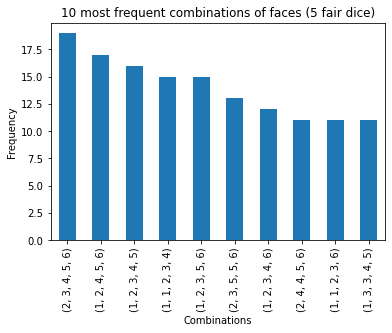

In [21]:
comb_df = analyze1.combo().sort_values(by=['count'], ascending = False)


comb_df['count'].head(n=10).plot.bar(
            title='10 most frequent combinations of faces (5 fair dice)', # Adding a title to the top
            xlabel="Combinations", # Adding a label on the xaxis
            ylabel="Frequency")


<AxesSubplot:title={'center':'10 most frequent combinations of faces (Unfair dice)'}, xlabel='Combinations', ylabel='Frequency'>

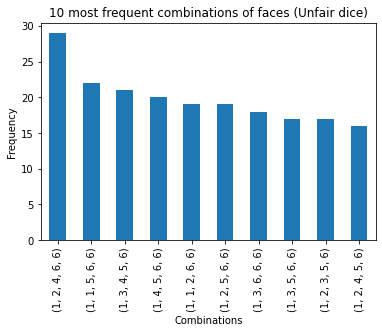

In [22]:
comb_df = analyze2.combo().sort_values(by=['count'], ascending = False)

comb_df['count'].head(n=10).plot.bar(
            title='10 most frequent combinations of faces (Unfair dice)', # Adding a title to the top
            xlabel="Combinations", # Adding a label on the xaxis
            ylabel="Frequency")

## Scenario 3

In [24]:
import string 

letters = list(string.ascii_uppercase)
frequency = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 
            3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

die = Die(letters)
die.weight = frequency
die.df = pd.DataFrame({"face": die.face, "weight": die.weight})

gm = Game([die, die, die, die, die])

game = gm.play(1000)

analyze = Analyzer(game)

permutation_lst = []
        
turns = max(analyze.result["Roll Number"])
        
for i in range(1, turns + 1):
    lst = [str(j) for j in analyze.result[analyze.result["Roll Number"] == i]["Roll"]]
            
    lst_string = " ".join(lst)
            
    if lst_string in permutation_lst:
        pass
    else:
        permutation_lst.append(lst_string)
        
permutation_lst

['R T I L A',
 'O G R L S',
 'R B I C U',
 'A I U O O',
 'E S S T A',
 'O M R L L',
 'I R R N D',
 'T D I C E',
 'U C E B T',
 'T B P C Q',
 'E I N O O',
 'D A I N L',
 'T U Y N T',
 'H M N B T',
 'S T O L Z',
 'S A U G U',
 'S D N E T',
 'T M C R T',
 'F L I N U',
 'I A U P R',
 'N O L A L',
 'O M D E F',
 'A L U R J',
 'H A O N T',
 'A Y T N H',
 'F R S O S',
 'E R I S T',
 'R R R W E',
 'R E S A R',
 'N O Z T A',
 'R R T E E',
 'M I Y M P',
 'N E K C F',
 'G U A T T',
 'A A S A T',
 'E I N L A',
 'Y D L C E',
 'S N I M O',
 'B E T R T',
 'I A N A V',
 'L T L T R',
 'E C K N E',
 'N R C U C',
 'L P E U L',
 'I R E D C',
 'A D S A V',
 'D S A O Y',
 'R O U E O',
 'I B R T A',
 'P E E N S',
 'M I L A O',
 'N N A R C',
 'I G N N I',
 'A V T M L',
 'C C R L B',
 'T T V E S',
 'I I A H U',
 'M O P D O',
 'I A A N S',
 'I E M I T',
 'U R G I A',
 'A E T G D',
 'R E U R R',
 'L E S I S',
 'V P G I I',
 'G O A S H',
 'S A Z S A',
 'S B M S U',
 'A N I H R',
 'B C E T W',
 'M A E F T',
 'E C 

Based on my initial glance through the list of words, I did not see any english words pop up.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [8]:
!ls -lRF -o

.:
total 124
drwxr-sr-x 2 rjw8ng  1024 Jul 14 09:58 Die_Game/
drwxr-sr-x 2 rjw8ng  2048 Jul 14 09:58 Die_Game.egg-info/
-rw-r--r-- 1 rjw8ng   729 Jul 14 09:58 Die_results.txt
-rw-r--r-- 1 rjw8ng  1063 Jul 14 09:58 LICENSE
-rw-r--r-- 1 rjw8ng 73748 Jul 14 09:58 montecarlo_demo.ipynb
-rw-r--r-- 1 rjw8ng  5748 Jul 14 09:58 montecarlo_tests.py
-rw-r--r-- 1 rjw8ng  7444 Jul 14 09:58 README.md
-rw-r--r-- 1 rjw8ng   298 Jul 14 09:58 setup.py

./Die_Game:
total 20
-rw-r--r-- 1 rjw8ng    1 Jul 14 09:58 __init__.py
-rw-r--r-- 1 rjw8ng 9294 Jul 14 09:58 montecarlo.py

./Die_Game.egg-info:
total 16
-rw-r--r-- 1 rjw8ng   1 Jul 14 09:58 dependency_links.txt
-rw-r--r-- 1 rjw8ng 246 Jul 14 09:58 PKG-INFO
-rw-r--r-- 1 rjw8ng 219 Jul 14 09:58 SOURCES.txt
-rw-r--r-- 1 rjw8ng   9 Jul 14 09:58 top_level.txt


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [9]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/rjw8ng/Documents/MSDS/DS5100/DS-5100-Final-Project
  Attempting uninstall: Die-Game
    Found existing installation: Die-Game 0.1
    Uninstalling Die-Game-0.1:
      Successfully uninstalled Die-Game-0.1
  Running setup.py develop for Die-Game
